#Line Chart

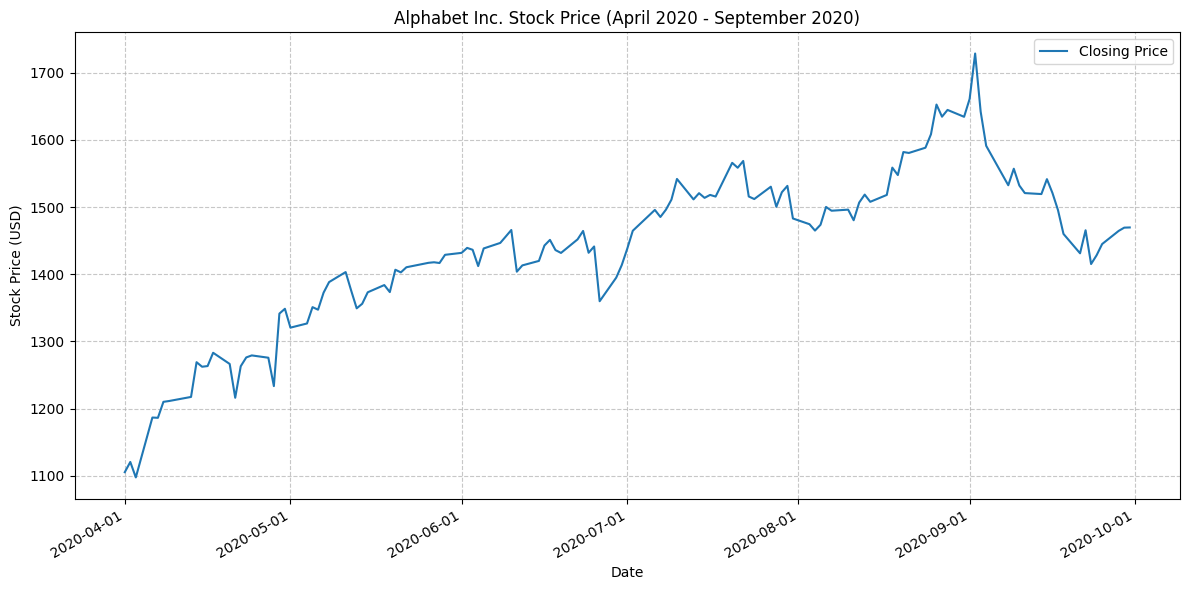

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
df = pd.read_csv('alphabet_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price')
plt.title('Alphabet Inc. Stock Price (April 2020 - September 2020)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.gcf().autofmt_xdate()
date_formatter = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


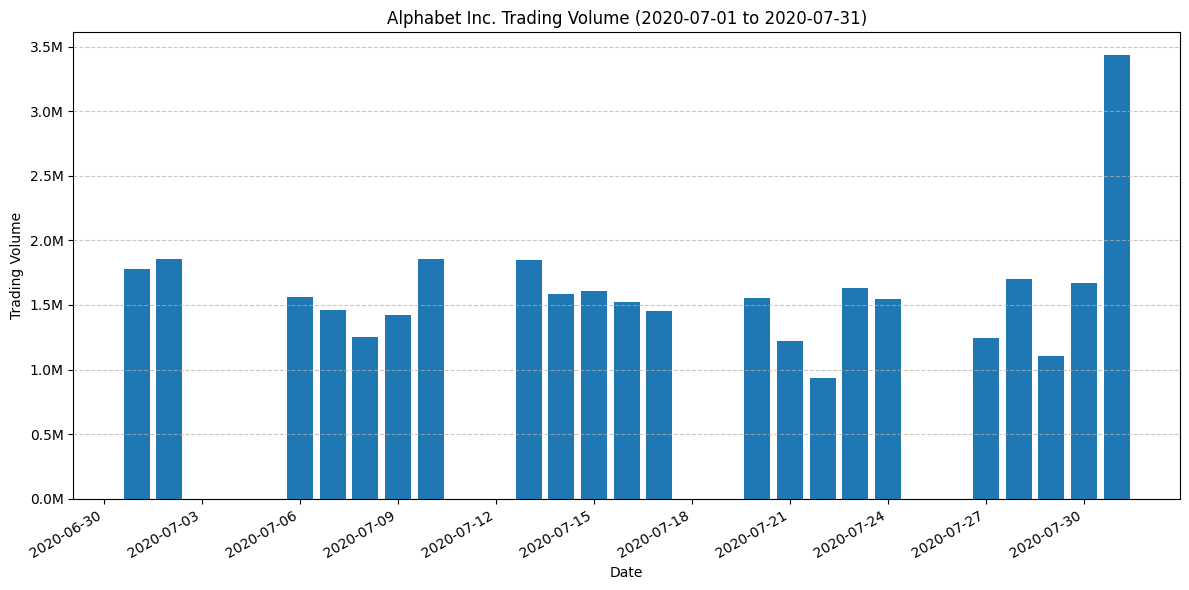

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
df = pd.read_csv('alphabet_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
start_date = '2020-07-01'
end_date = '2020-07-31'
df_filtered = df.loc[start_date:end_date]
plt.figure(figsize=(12, 6))
plt.bar(df_filtered.index, df_filtered['Volume'], width=0.8, align='center')
plt.title(f'Alphabet Inc. Trading Volume ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.gcf().autofmt_xdate()

date_formatter = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

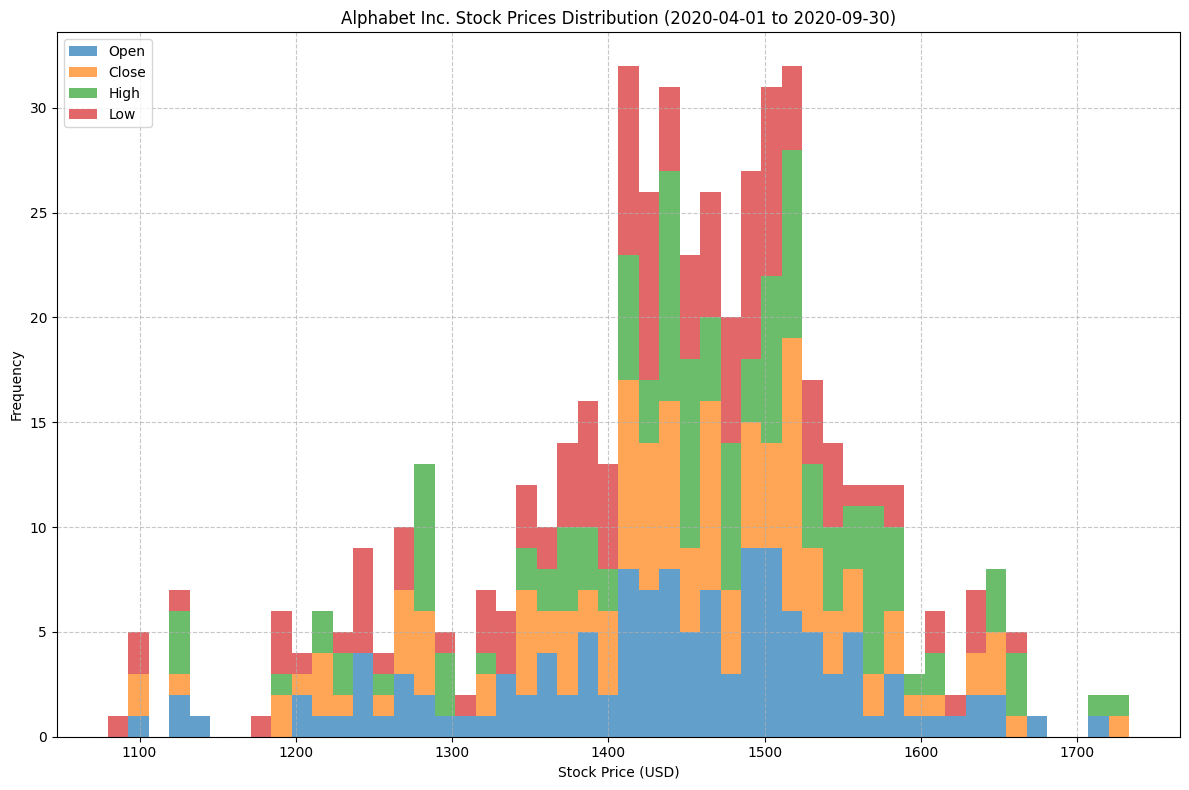

Stock Price Statistics:

Open:
count     127.000000
mean     1437.224618
std       119.244782
min      1098.260010
25%      1380.705017
50%      1447.160034
75%      1512.505005
max      1709.713989
Name: Open, dtype: float64

Close:
count     127.000000
mean     1438.388617
std       119.515431
min      1097.880005
25%      1379.839966
50%      1451.119995
75%      1516.830017
max      1728.280029
Name: Close, dtype: float64

High:
count     127.000000
mean     1455.825043
std       120.216765
min      1123.540039
25%      1397.179993
50%      1460.959961
75%      1528.865967
max      1733.180054
Name: High, dtype: float64

Low:
count     127.000000
mean     1419.578084
std       118.475865
min      1079.810059
25%      1364.377502
50%      1429.776978
75%      1497.830017
max      1666.329956
Name: Low, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('alphabet_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
start_date = '2020-04-01'
end_date = '2020-09-30'
df_filtered = df.loc[start_date:end_date]
n_bins = 50
plt.figure(figsize=(12, 8))
price_min = min(df_filtered[['Open', 'Close', 'High', 'Low']].min())
price_max = max(df_filtered[['Open', 'Close', 'High', 'Low']].max())
bin_range = np.linspace(price_min, price_max, n_bins + 1)

plt.hist([df_filtered['Open'], df_filtered['Close'], df_filtered['High'], df_filtered['Low']],
         bins=bin_range,
         label=['Open', 'Close', 'High', 'Low'],
         stacked=True,
         alpha=0.7)
plt.title(f'Alphabet Inc. Stock Prices Distribution ({start_date} to {end_date})')
plt.xlabel('Stock Price (USD)')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Stock Price Statistics:")
for column in ['Open', 'Close', 'High', 'Low']:
    print(f"\n{column}:")
    print(df_filtered[column].describe())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# Read the CSV file
df = pd.read_csv('alphabet_stock_data.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df.sort_index(inplace=True)

# Define the date range
start_date = '2020-04-01'
end_date = '2020-09-30'

# Filter the dataframe for the specified date range
df_filtered = df.loc[start_date:end_date]

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_filtered['Close'], df_filtered['Volume'],
                      c=df_filtered.index, cmap='viridis',
                      alpha=0.7, s=50)

# Customize the plot
plt.title(f'Alphabet Inc. Trading Volume vs. Stock Price ({start_date} to {end_date})')
plt.xlabel('Closing Stock Price (USD)')
plt.ylabel('Trading Volume')

# Format y-axis labels to display volume in millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Add colorbar to show date progression
cbar = plt.colorbar(scatter)
cbar.set_label('Date')
cbar.ax.yaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate some interesting points
for i, (index, row) in enumerate(df_filtered.iterrows()):
    if i % 30 == 0:  # Annotate every 30th point to avoid clutter
        plt.annotate(index.strftime('%Y-%m-%d'),
                     (row['Close'], row['Volume']),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=8, alpha=0.8)

# Add a best fit line
z = np.polyfit(df_filtered['Close'], df_filtered['Volume'], 1)
p = np.poly1d(z)
plt.plot(df_filtered['Close'], p(df_filtered['Close']), "r--", alpha=0.8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Optional: Save the plot as an image file
# plt.savefig('alphabet_volume_price_scatter.png', dpi=300, bbox_inches='tight')

# Print correlation coefficient
correlation = df_filtered['Close'].corr(df_filtered['Volume'])
print(f"Correlation coefficient between Closing Price and Volume: {correlation:.2f}")

OverflowError: int too big to convert

Error in callback <function _draw_all_if_interactive at 0x7f90b5167130> (for post_execute):


OverflowError: int too big to convert

OverflowError: int too big to convert

<Figure size 1200x800 with 2 Axes>

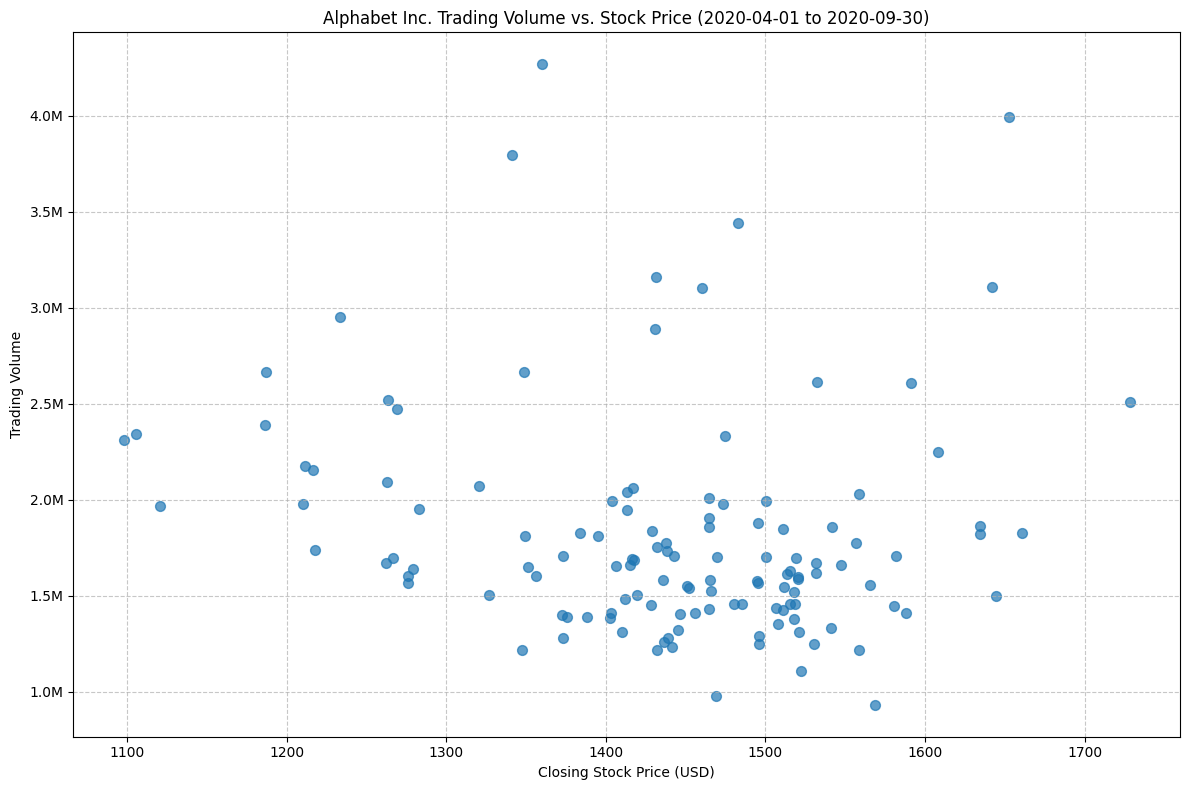

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
df = pd.read_csv('alphabet_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
start_date = '2020-04-01'
end_date = '2020-09-30'
df_filtered = df.loc[start_date:end_date]
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['Close'], df_filtered['Volume'],
            alpha=0.7, s=50)
plt.title(f'Alphabet Inc. Trading Volume vs. Stock Price ({start_date} to {end_date})')
plt.xlabel('Closing Stock Price (USD)')
plt.ylabel('Trading Volume')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


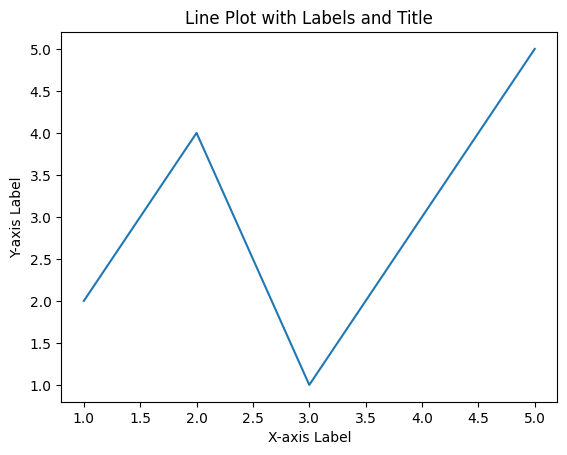

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 3, 5]
plt.plot(x, y)
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Line Plot with Labels and Title")
plt.show()


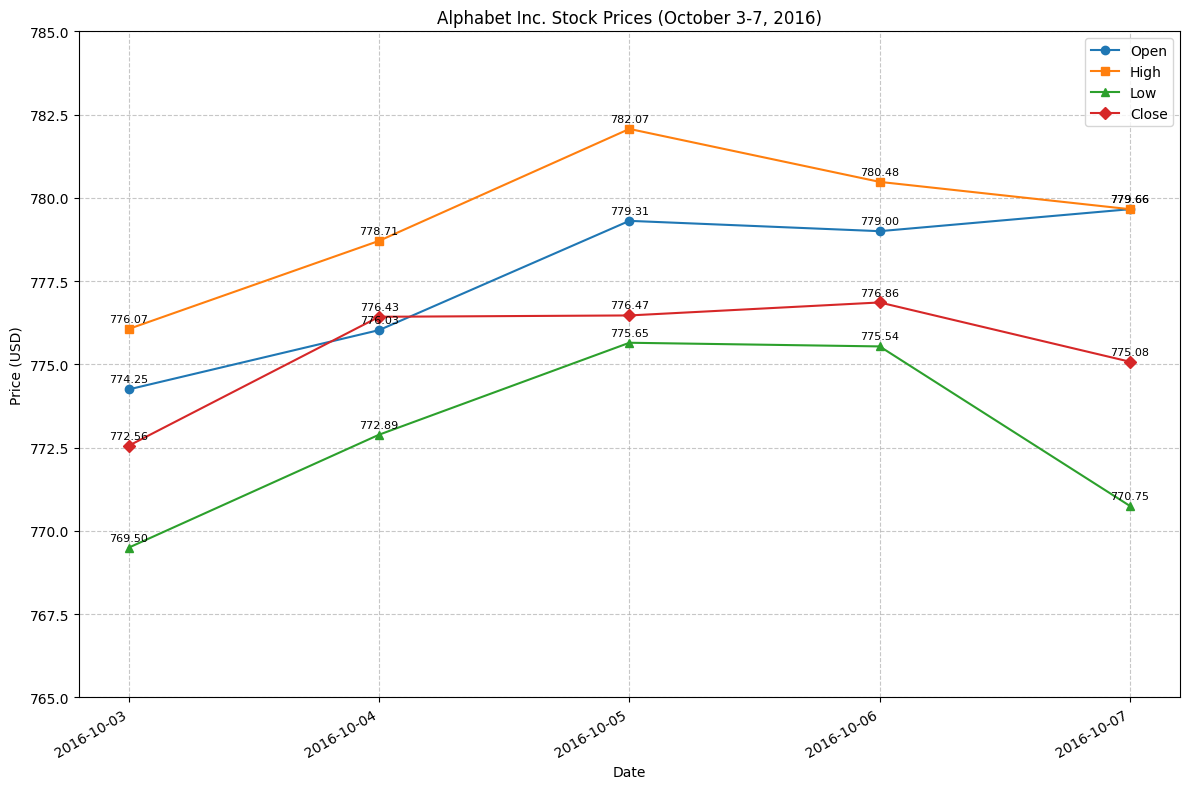

             Open        High         Low       Close
count    5.000000    5.000000    5.000000    5.000000
mean   777.650000  779.396997  772.866003  775.479993
std      2.387592    2.233893    2.770782    1.765877
min    774.250000  776.065002  769.500000  772.559998
25%    776.030029  778.710022  770.750000  775.080017
50%    779.000000  779.659973  772.890015  776.429993
75%    779.309998  780.479980  775.539978  776.469971
max    779.659973  782.070007  775.650024  776.859985


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Date': ['10-03-16', '10-04-16', '10-05-16', '10-06-16', '10-07-16'],
    'Open': [774.25, 776.030029, 779.309998, 779, 779.659973],
    'High': [776.065002, 778.710022, 782.070007, 780.47998, 779.659973],
    'Low': [769.5, 772.890015, 775.650024, 775.539978, 770.75],
    'Close': [772.559998, 776.429993, 776.469971, 776.859985, 775.080017]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df.set_index('Date', inplace=True)
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Open'], label='Open', marker='o')
plt.plot(df.index, df['High'], label='High', marker='s')
plt.plot(df.index, df['Low'], label='Low', marker='^')
plt.plot(df.index, df['Close'], label='Close', marker='D')
plt.title('Alphabet Inc. Stock Prices (October 3-7, 2016)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()  # Rotate and align the tick labels
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.DayLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.ylim(765, 785)

for column in ['Open', 'High', 'Low', 'Close']:
    for x, y in zip(df.index, df[column]):
        plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
plt.tight_layout()
plt.show()
print(df.describe())

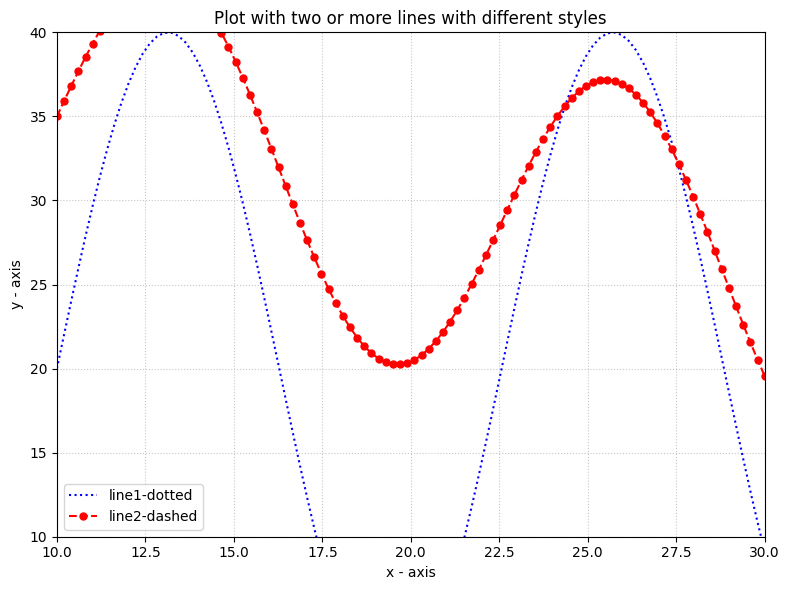

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(10, 30, 100)
y1 = 20 + 20 * np.sin(0.5 * (x - 10))
y2 = 40 - x / 2 + 10 * np.sin(0.5 * (x - 10))
plt.figure(figsize=(8, 6))
plt.plot(x, y1, color='blue', linestyle=':', label='line1-dotted')
plt.plot(x, y2, color='red', linestyle='--', marker='o', markersize=5, label='line2-dashed')
plt.title('Plot with two or more lines with different styles')
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.xlim(10, 30)
plt.ylim(10, 40)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()